In [1]:
# Module importieren

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [2]:
# Daten in Pandas DF laden
data = pd.read_csv("autos-1647012077.csv", index_col="Unnamed: 0")
data

,geschwindigkeit,distanz
1,4,2
2,4,10
3,7,4
4,5,12
5,8,16
6,9,10
7,10,18
8,10,26
9,10,14
10,11,17


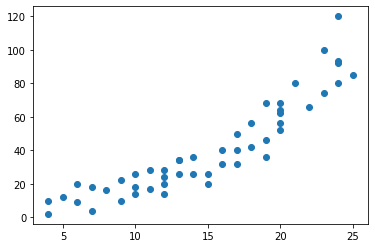

In [3]:
# x und y definieren
x = data["geschwindigkeit"].values.reshape(-1,1)
y = data["distanz"].values

# Scatterplot
plt.scatter(x,y)
plt.show()

In [4]:
# Linearer Regressions model
model = LinearRegression().fit(x,y)

In [5]:
# Parameter der Linearen Gerade
steigung = model.coef_
achsenabschnitt = model.intercept_
r2 = model.score(x,y)
print("R2", r2)
# x und y korrelieren. 

R2 0.8243250457863955


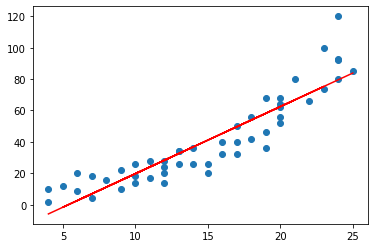

In [6]:
# Scatter plot mit Gerade erstellen
plt.scatter(x,y)
plt.plot(x, steigung * x + achsenabschnitt, color = "r")
plt.show()

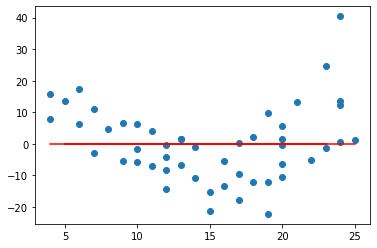

In [7]:
# Residuen berechnen und plotten (Residuenanalyse => mue = 0, Unabahengig, Normalverteilt)
y_predict = model.predict(x)
residuen = y - y_predict

plt.scatter(x,residuen)
plt.plot(x,x*0, color = "r")
plt.show()
# Residuen sind nicht unabhaengig, (Parabel form)

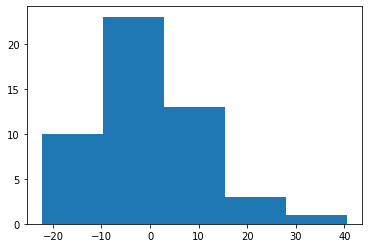

In [8]:
# Residuen Histogramm
plt.hist(x=residuen, bins = 5, stacked = True, density = False)
plt.show()
# Schiefe Normalverteilung (Koennte aber auch eine Expo Verteilung sein oder Poisson)

In [9]:
# Model nicht optimal, da nicht alle Residuenkriterien erfuellt werden.
# Versuchen mit einer Variabeltransformation, um evtl einen besseren Linearen Zusammenhang zu finden. 

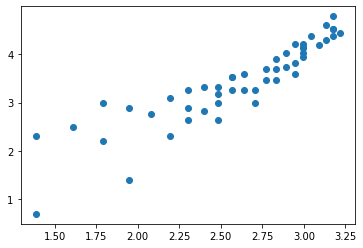

R2_log =  0.8243250457863955


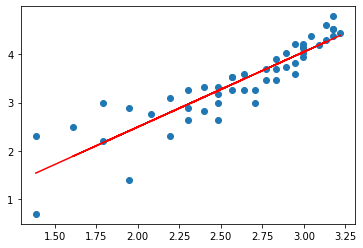

In [10]:
# Variabel Transformation
x_log = np.log(x)
y_log = np.log(y)

# Scatterplot
plt.scatter(x_log, y_log)
plt.show()

# Linearer Regressionmodell erstellen
model_log = LinearRegression().fit(x_log,y_log)

# Parameter der Geraden
steigung_log = model_log.coef_
achsenabschnitt_log = model_log.intercept_
r2_log = model.score(x, y)
print("R2_log = ", r2_log)

# Scatter mit Gerade
plt.scatter(x_log, y_log)
plt.plot(x_log, x_log * steigung_log + achsenabschnitt_log, c = "r")
plt.show()